In [625]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


import warnings
warnings.filterwarnings('ignore')

In [626]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data cleaning

In [627]:
df.shape

(5110, 12)

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [629]:
# drop id column
df.drop('id',axis=1, inplace=True)

In [630]:
# duplicates
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [631]:
# missing value
df.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [632]:
# df_null = df[df.isna().any(axis=1)]
# df = df.dropna()

# flling bmi missing value with KNN Imputer
knnimp = KNNImputer(n_neighbors=3)
newdata = knnimp.fit_transform(np.array(df['bmi']).reshape(-1, 1))
newdata = newdata.ravel()
df['bmi'] = pd.Series(newdata)

Handling categorical value

In [633]:
# get unique value for categorical columns
cate_col = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in cate_col:
    print(f'{col}: {df[col].unique()}')

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [634]:
# get dummies
df = pd.get_dummies(df, columns=cate_col, drop_first=True)

In [635]:
df.head(4)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1


Distribution

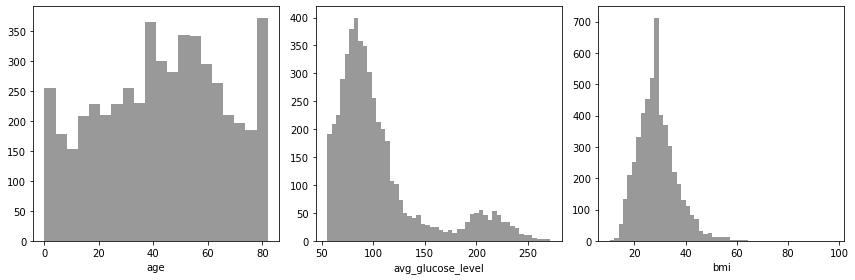

In [636]:
# distribution of continuous columns
conti_col = ['age', 'avg_glucose_level','bmi']

plt.figure(figsize=(12,4))
for ind, col in enumerate(conti_col):
    plt.subplot(1,3, ind+1)
    sns.distplot(df[col], color='black', kde=False)
plt.tight_layout()
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


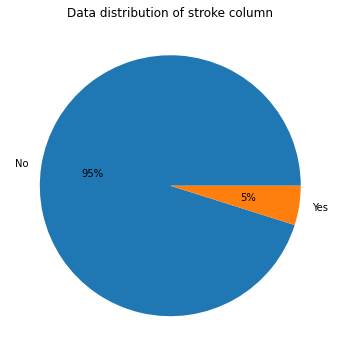

In [637]:
# get count of unique value
print(df['stroke'].value_counts())
data = df['stroke'].value_counts().values

# get labels of unique value
# label = df['stroke'].value_counts().index.to_list()
label = ['No', 'Yes']

plt.figure(figsize=(8,6), facecolor='white')
plt.pie(data, labels=label, autopct='%.0f%%')
plt.title('Data distribution of stroke column')
plt.show()

Outlier Detection

In [638]:
def iqr_outliers(seri):
    q1 = seri.quantile(0.25)
    q3 = seri.quantile(0.75)
    iqr = q3 - q1
    up_fence = q3 + 1.5*iqr 
    low_fence = q1 - 1.5*iqr 
    return low_fence, up_fence

low, up = iqr_outliers(df['bmi'])

# concat a dataframe of outliers with stroke == 1 back to df 
df_upper = df[df['bmi'] > up]
df_upper = df_upper[df_upper['stroke'] ==1]

df = df[df['bmi'] > low]
df = df[df['bmi'] < up]

# concat 
df = pd.concat([df, df_upper])

Data correlation

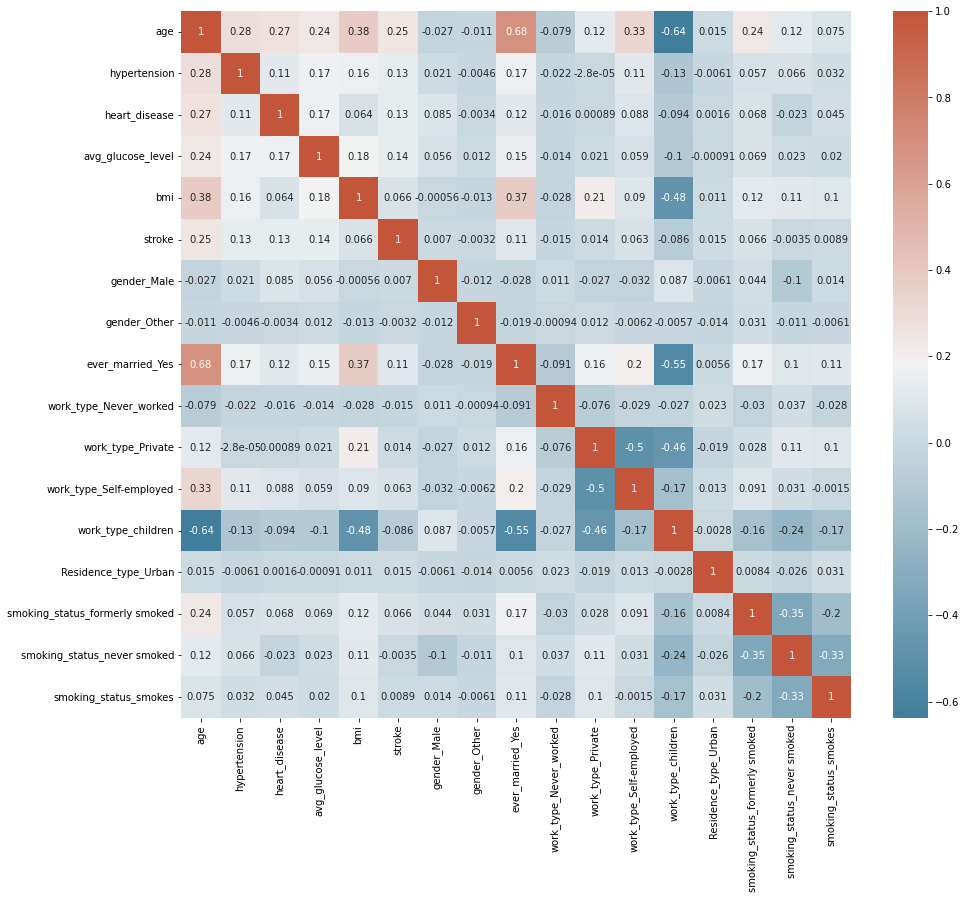

In [639]:
# pearson correlationo
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plotting
plt.figure(figsize=(15,13))
sns.heatmap(data=corr,annot=True, cmap=cmap)
plt.show()

In [640]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,43.212304,0.095849,0.055143,105.803232,28.298103,0.049930,0.418689,0.000201,0.653299,0.004411,0.569080,0.160818,0.137558,0.509324,0.172849,0.368759,0.154602
std,22.783908,0.294414,0.228283,44.912674,6.652686,0.217822,0.493394,0.014161,0.475967,0.066279,0.495255,0.367400,0.344470,0.499963,0.378155,0.482517,0.361561
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.215000,23.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.200000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,113.845000,32.300000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Selection

In [641]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
# categorical variables may or maynot be added if any
variables = df.drop('stroke',axis=1)
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,47.227525,const
1,2.893843,age
2,1.116151,hypertension
3,1.116874,heart_disease
4,1.108025,avg_glucose_level
5,1.373167,bmi
6,1.029908,gender_Male
7,1.002944,gender_Other
8,2.006434,ever_married_Yes
9,1.059854,work_type_Never_worked


Modeling

In [642]:
# assign variables
X = df.drop(axis=1,columns=['work_type_children','work_type_Private','stroke',])
y = df['stroke']

In [643]:
# scale X
mms = MinMaxScaler()
mms.fit(X)
X = mms.transform(X)

# display data after transformation (apply Minmax scaler will keep binary data as original)
df_X = pd.DataFrame(X[:10])
df_X.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.816895,0.0,1.0,0.801265,0.558499,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.388372,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.467991,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.509934,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [644]:
# split data
X_train , X_test , y_train , y_test = train_test_split (X, y, random_state = 0 , test_size = 0.2 )

#  data size
print('Train size:', len(y_train))
print(y_train.value_counts()) 
print('-----------------------')
print('Test size', len(y_test))
print(y_test.value_counts())

Train size: 3989
0    3792
1     197
Name: stroke, dtype: int64
-----------------------
Test size 998
0    946
1     52
Name: stroke, dtype: int64


Accuracy = 0.9478957915831663
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       0.00      0.00      0.00        52

    accuracy                           0.95       998
   macro avg       0.47      0.50      0.49       998
weighted avg       0.90      0.95      0.92       998



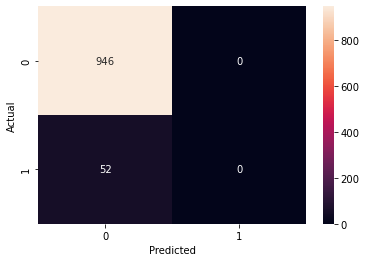

In [645]:
# model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

In [646]:
# handle balance 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 

sm = SMOTE(random_state=42) 
X_train, y_train = sm.fit_resample(X_train, y_train)

# sm = SMOTE(random_state=42, k_neighbors=1) 
# X_test, y_test = sm.fit_resample(X_test, y_test)

print('Train size:', len(y_train))
print(y_train.value_counts())
print('-----------------------')
print('Test size', len(y_test))
print(y_test.value_counts())

Train size: 7584
0    3792
1    3792
Name: stroke, dtype: int64
-----------------------
Test size 998
0    946
1     52
Name: stroke, dtype: int64


Accuracy = 0.7214428857715431
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       946
           1       0.14      0.83      0.24        52

    accuracy                           0.72       998
   macro avg       0.56      0.77      0.53       998
weighted avg       0.94      0.72      0.80       998



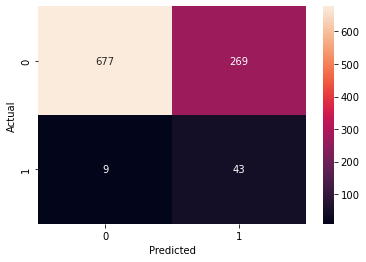

In [647]:
# model
reg = LogisticRegression() 
reg.fit(X_train,y_train) 
y_pred = reg.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Decision Tree

Accuracy = 0.8637274549098196
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       946
           1       0.14      0.33      0.20        52

    accuracy                           0.86       998
   macro avg       0.55      0.61      0.56       998
weighted avg       0.92      0.86      0.89       998



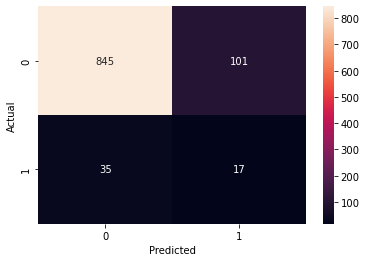

In [650]:
dd = DecisionTreeClassifier()
dd.fit(X_train,y_train)
y_pred = dd.predict(X_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()